## Sentiment Analysis on US Airline Reviews

In [1]:
# pip install tensorflow


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
# from joblib import dump

df = pd.read_csv("/Users/amitabhsvirk/Downloads/archive/Tweets.csv")

In [3]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

## We will only take text and Sentiment Column

In [6]:
tweet_df = df[['text','airline_sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


## Removing all the neutral sentiments because we are only interested in positive and Negative

In [7]:
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [8]:
tweet_df["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# def data_cleaner(data):
#     clean_data = []
#     for sentence in tqdm(data):
#         cleantext = BeautifulSoup(sentence, "lxml").text #html tags
#         cleantext = re.sub(r'[^\w\s]','',cleantext) # punctuation
#         cleantext = [token for token in cleantext.lower().split() if token not in stopword] #stopword
#         clean_text = ' '.join([lemmatizer.lemmatize(token) for token in cleantext])
#         clean_data.append(clean_text.strip())
#     return clean_data

## Factorizing the data into 0 and 1 based on negative and positive

In [9]:
sentiment_label = tweet_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

## We will give each of the unique words a unique number and then replace that word with the number assigned.

The fit_on_texts() method creates an association between the words and the assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute.
 Replace the words with their assigned numbers using the text_to_sequence() method.
 Each of the sentences in the dataset is not of equal length. Use padding to pad the sentences to have equal length.

In [10]:
tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1 
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [11]:
# print(tokenizer.word_index)

In [12]:
print(tweet[0])
print(encoded_docs[0])

@VirginAmerica plus you've added commercials to the experience... tacky.
[103, 575, 530, 1287, 2416, 1, 2, 177]


In [13]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  103  575  530 1287
 2416 

In [14]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 27s 91ms/step - loss: 0.3857 - accuracy: 0.8400 - val_loss: 0.2077 - val_accuracy: 0.9181
Epoch 2/5
289/289 [==============================] - 27s 93ms/step - loss: 0.2166 - accuracy: 0.9164 - val_loss: 0.1693 - val_accuracy: 0.9359
Epoch 3/5
289/289 [==============================] - 27s 94ms/step - loss: 0.1600 - accuracy: 0.9397 - val_loss: 0.1600 - val_accuracy: 0.9420
Epoch 4/5
289/289 [==============================] - 27s 93ms/step - loss: 0.1329 - accuracy: 0.9518 - val_loss: 0.1959 - val_accuracy: 0.9428
Epoch 5/5
289/289 [==============================] - 27s 94ms/step - loss: 0.1111 - accuracy: 0.9588 - val_loss: 0.1731 - val_accuracy: 0.9389


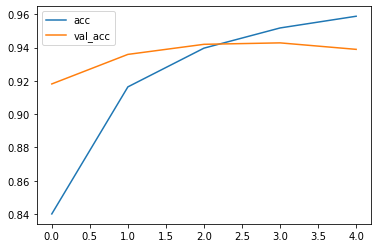

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

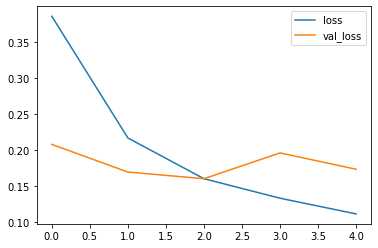

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [18]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [19]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  positive
Predicted label:  negative


In [20]:
test = "This flight was alright"
predict_sentiment(test)

Predicted label:  positive


In [21]:
# dump(model,"model2.joblib")

In [22]:
# import streamlit as st
# # from transformers import pipeline

# st.title('Sentiment Analyser App')
# # st.write('This app uses the Hugging Face Transformers [sentiment analyser](https://huggingface.co/course/chapter1/3?fw=tf) library to clasify the sentiment of your input as postive or negative. The web app is built using [Streamlit](https://docs.streamlit.io/en/stable/getting_started.html).')
# # st.write(
# #     'To find out how this app was developed, please check out my [Medium post](https://medium.com/@rtkilian/deploy-and-share-your-sentiment-analysis-app-using-streamlit-sharing-2ba3ca6a3ead). To see my source code, have a look at my [GitHub repo](https://github.com/rtkilian/streamlit-huggingface).')

# # st.write('*Note: it will take up to 30 seconds to run the app.*')

# form = st.form(key='sentiment-form')
# user_input = form.text_area('Enter your text')
# submit = form.form_submit_button('Submit')

# predict_sentiment(user_input)